In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data_path = '/content/spam.csv'
data = pd.read_csv(data_path, encoding='latin-1')

In [ ]:
print(data.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
print(data.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [ ]:
data.columns = ['label', 'text']


In [ ]:
print(data.head())


  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


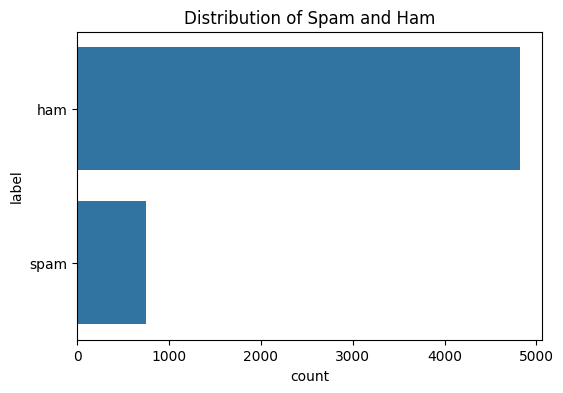

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data['label'])
plt.title('Distribution of Spam and Ham')
plt.show()


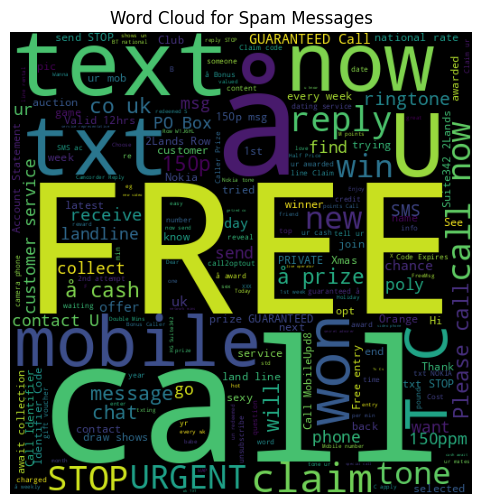

In [ ]:
spam_words = ' '.join(list(data[data['label'] == 'spam']['text']))
spam_wc = WordCloud(width=512, height=512).generate(spam_words)
plt.figure(figsize=(6, 6))
plt.imshow(spam_wc)
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

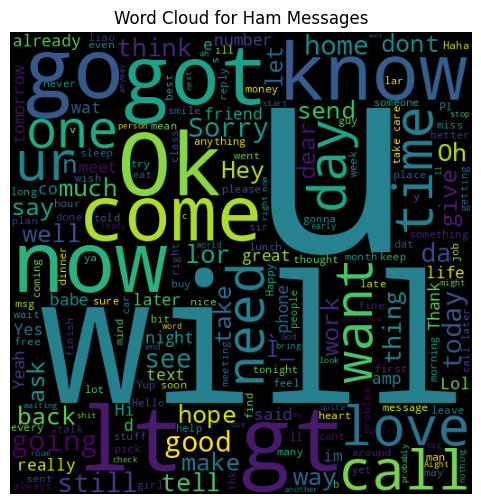

In [ ]:
ham_words = ' '.join(list(data[data['label'] == 'ham']['text']))
ham_wc = WordCloud(width=512, height=512).generate(ham_words)
plt.figure(figsize=(6, 6))
plt.imshow(ham_wc)
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

In [ ]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

In [ ]:
data['text'] = data['text'].apply(preprocess_text)

In [ ]:
print(data.head())


   label                                               text
0      0  go jurong point crazy available bugis n great ...
1      0                            ok lar joking wif u oni
2      1  free entry 2 wkly comp win fa cup final tkts 2...
3      0                u dun say early hor u c already say
4      0        nah dont think goes usf lives around though


In [ ]:
X = data['text']
y = data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [ ]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
def plot_roc_curve(fpr, tpr, auc_score, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

def plot_precision_recall_curve(precision, recall, auc_score, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'PR curve (area = {auc_score:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='lower left')
    plt.show()


In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train)
y_pred_nb = nb_model.predict(X_test_vect)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cr_nb = classification_report(y_test, y_pred_nb)

Naive Bayes Model:
Accuracy: 0.967713004484305


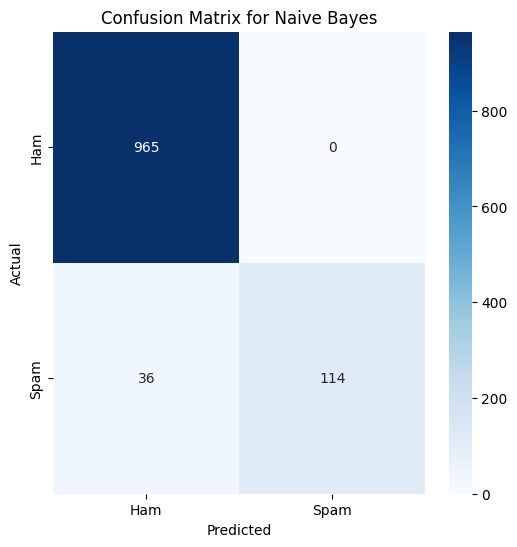

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


------------------------------------------------------------



In [ ]:
print("Naive Bayes Model:")
print(f"Accuracy: {accuracy_nb}")
plot_confusion_matrix(cm_nb, 'Confusion Matrix for Naive Bayes')
print("Classification Report:")
print(cr_nb)
print("\n" + "-"*60 + "\n")

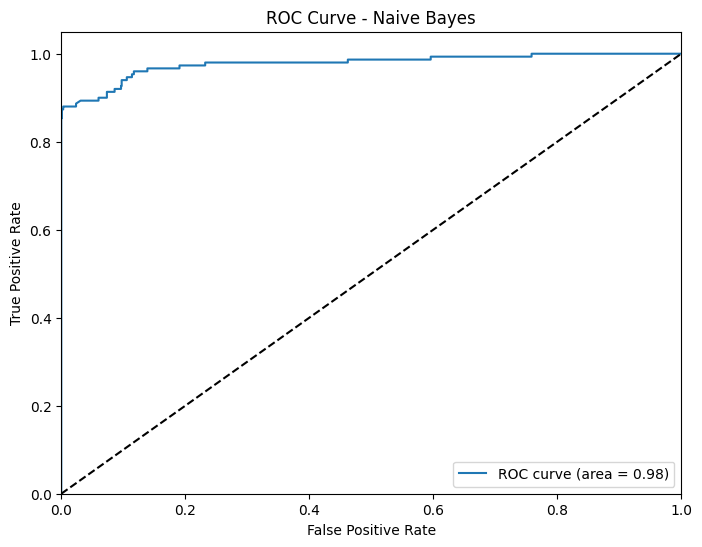

In [ ]:
y_prob_nb = nb_model.predict_proba(X_test_vect)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)
plot_roc_curve(fpr_nb, tpr_nb, roc_auc_nb, 'Naive Bayes')

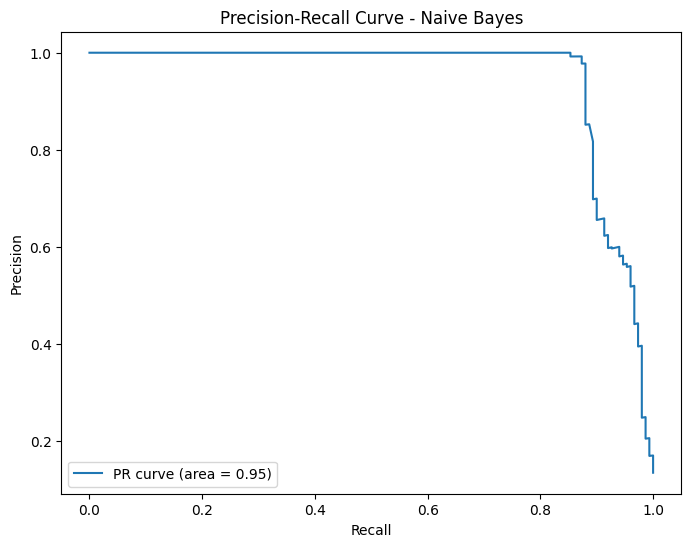

In [ ]:
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_prob_nb)
pr_auc_nb = auc(recall_nb, precision_nb)
plot_precision_recall_curve(precision_nb, recall_nb, pr_auc_nb, 'Naive Bayes')


Logistic Regression Model:
Accuracy: 0.9497757847533632


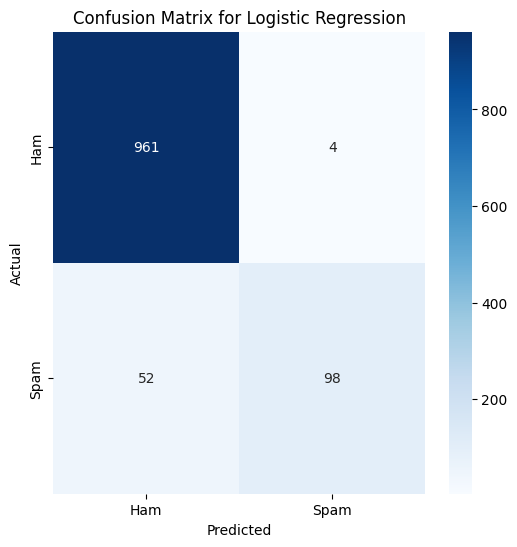

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.95      1115


------------------------------------------------------------



In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vect, y_train)
y_pred_lr = lr_model.predict(X_test_vect)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cr_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_lr}")
plot_confusion_matrix(cm_lr, 'Confusion Matrix for Logistic Regression')
print("Classification Report:")
print(cr_lr)
print("\n" + "-"*60 + "\n")

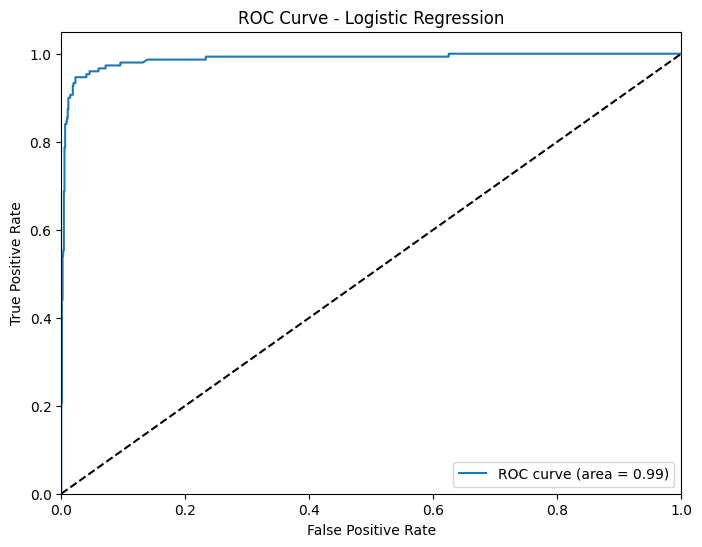

In [ ]:
y_prob_lr = lr_model.predict_proba(X_test_vect)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
plot_roc_curve(fpr_lr, tpr_lr, roc_auc_lr, 'Logistic Regression')

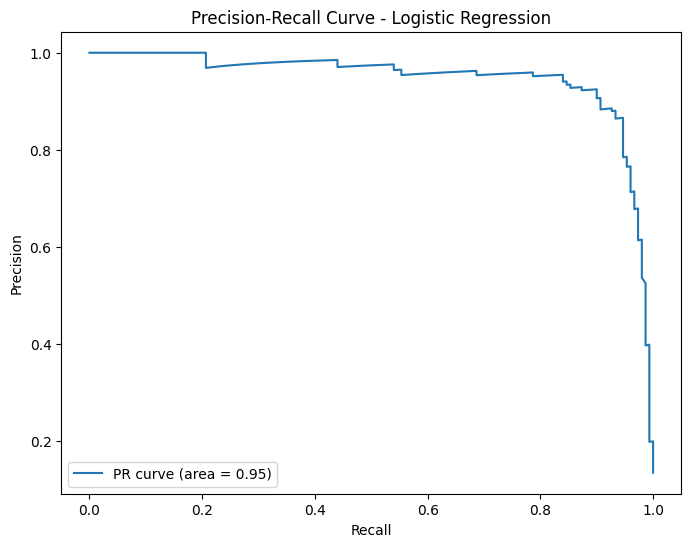

In [ ]:
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
pr_auc_lr = auc(recall_lr, precision_lr)
plot_precision_recall_curve(precision_lr, recall_lr, pr_auc_lr, 'Logistic Regression')

Support Vector Machine Model:
Accuracy: 0.979372197309417


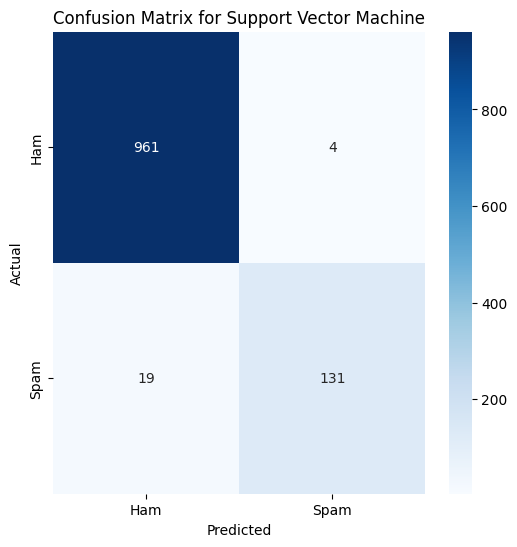

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


------------------------------------------------------------



In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vect, y_train)
y_pred_svm = svm_model.predict(X_test_vect)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cr_svm = classification_report(y_test, y_pred_svm)

print("Support Vector Machine Model:")
print(f"Accuracy: {accuracy_svm}")
plot_confusion_matrix(cm_svm, 'Confusion Matrix for Support Vector Machine')
print("Classification Report:")
print(cr_svm)
print("\n" + "-"*60 + "\n")

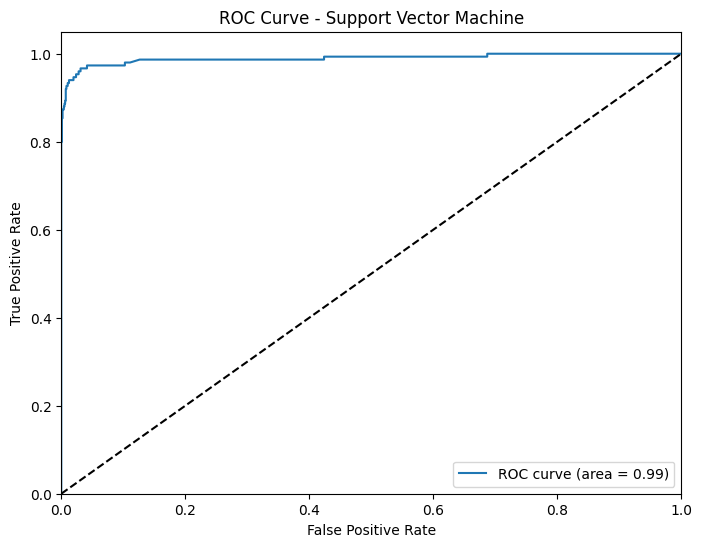

In [ ]:
y_prob_svm = svm_model.decision_function(X_test_vect)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)
plot_roc_curve(fpr_svm, tpr_svm, roc_auc_svm, 'Support Vector Machine')

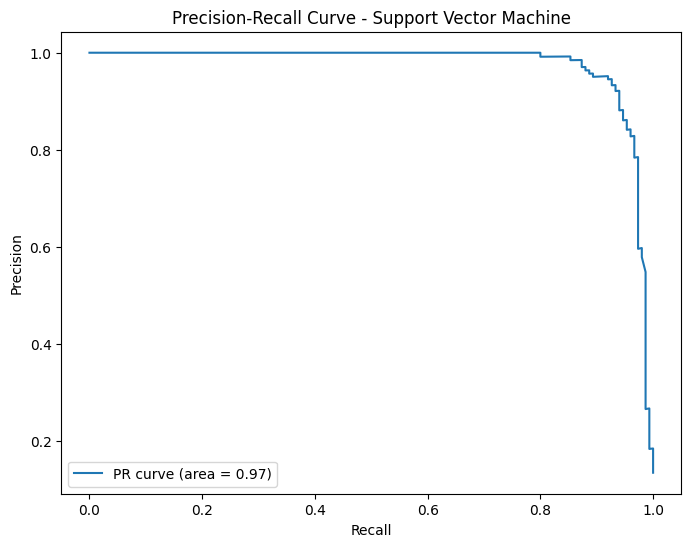

In [ ]:
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
pr_auc_svm = auc(recall_svm, precision_svm)
plot_precision_recall_curve(precision_svm, recall_svm, pr_auc_svm, 'Support Vector Machine')

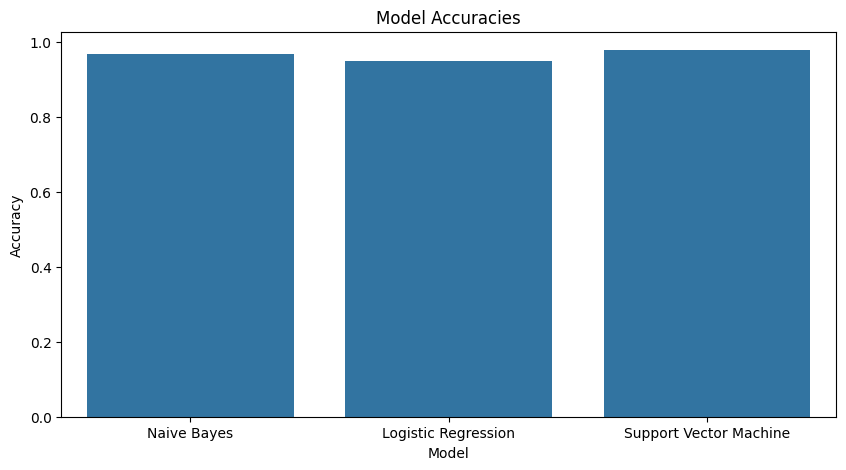

In [ ]:
accuracies = [accuracy_nb, accuracy_lr, accuracy_svm]
model_names = ["Naive Bayes", "Logistic Regression", "Support Vector Machine"]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Comparison table
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})
print("Model Comparison Table:")
print(comparison_df)


Model Comparison Table:
                    Model  Accuracy
0             Naive Bayes  0.967713
1     Logistic Regression  0.949776
2  Support Vector Machine  0.979372
